In [1]:
import tensorflow

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objs as pltgo

In [3]:
%config Completer.use_jedi = False

In [6]:
data = pd.read_csv("./datasets/advertising.csv")

In [7]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

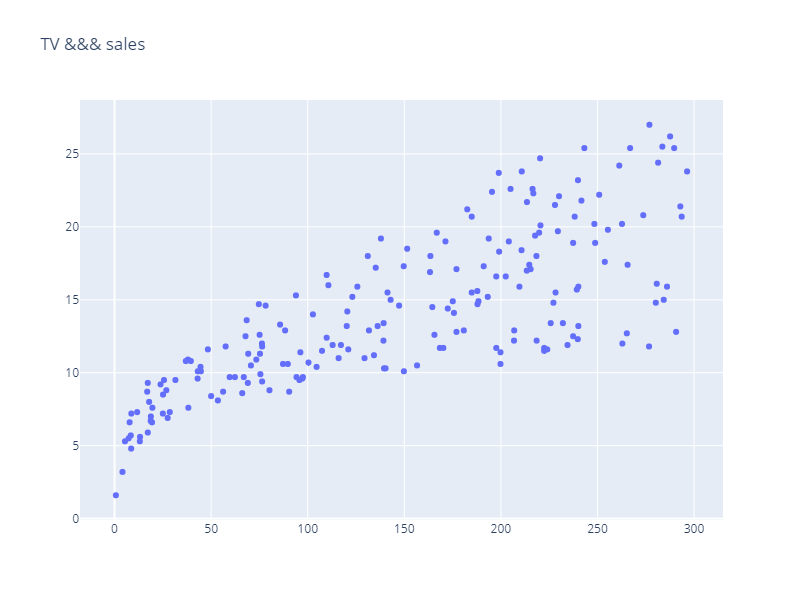

In [13]:
pltgo.Figure(data = pltgo.Scatter(
                x=data.TV,y=data.sales,mode='markers'),
             layout= pltgo.Layout(
                 width=600,height=600,title='TV &&& sales'))

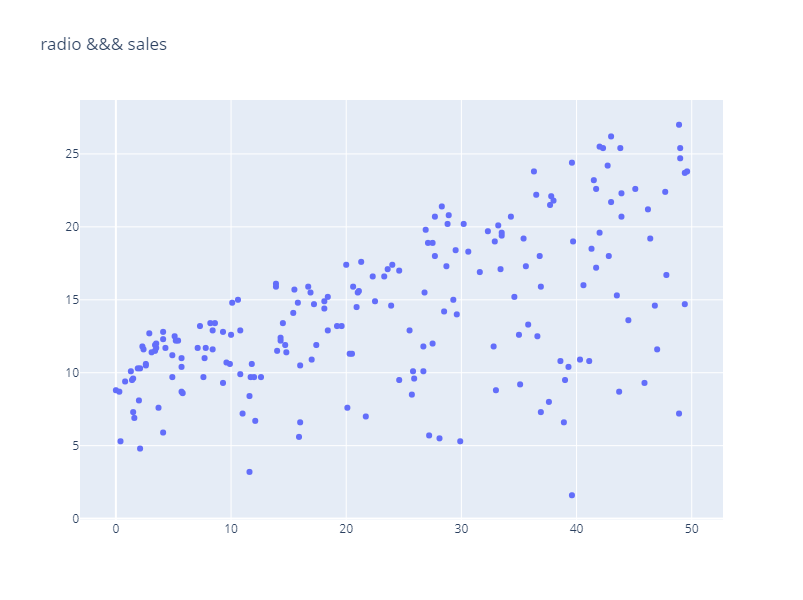

In [14]:
pltgo.Figure(data = pltgo.Scatter(
                x=data.radio,y=data.sales,mode='markers'),
             layout= pltgo.Layout(
                 width=600,height=600,title='radio &&& sales'))

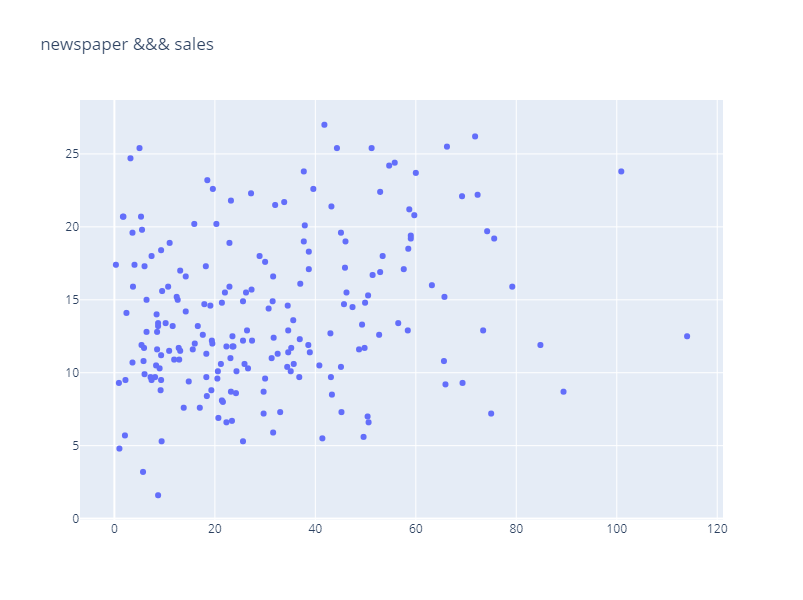

In [15]:
pltgo.Figure(data = pltgo.Scatter(
                x=data.newspaper,y=data.sales,mode='markers'),
             layout= pltgo.Layout(
                 width=600,height=600,title='newspaper &&& sales'))

In [22]:
x = data.iloc[:,0:-1]

In [23]:
y = data.iloc[:,-1]

In [25]:
model = tensorflow.keras.Sequential(
    [tensorflow.keras.layers.Dense(10,input_shape=(3,), activation = 'relu'),
     tensorflow.keras.layers.Dense(1)]
)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam',
             loss='mse')

In [30]:
history = model.fit(x,y,epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 6654.0889
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 5783.3979
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 5025.5200
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 4336.0254
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 3700.9243
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 3147.8613
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 2656.9929
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 2234.2598
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 1874.2205
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 1560.8079
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 1299.7007
Epoch 12/100
7/7 [==============================] - 0s 3ms/step - loss: 1076.7344
Epoch 13/100
7/7 [=======

In [37]:
data[['TV', 'radio', 'newspaper']].head(10)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [38]:
model.predict(data[['TV', 'radio', 'newspaper']].head(10))

array([[23.8993   ],
       [ 9.194356 ],
       [ 6.675713 ],
       [18.743814 ],
       [17.488764 ],
       [ 5.5646906],
       [ 9.09474  ],
       [10.120903 ],
       [ 1.152665 ],
       [12.651382 ]], dtype=float32)

In [39]:
data[['sales']].head(10)

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6
